In [0]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
sns.set()
pd.set_option("display.max_rows", 100)

In [0]:
PATH_TO_DATA = Path('drive/My Drive/sendy/data')
SEED = 42

In [0]:
train = pd.read_csv(PATH_TO_DATA / 'given/Train.csv')

In [0]:
train.sample(10)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
14942,Order_No_15233,User_Id_1594,Bike,3,Business,14,7,3:56:24 PM,14,7,4:15:26 PM,14,7,4:43:33 PM,14,7,4:45:03 PM,14,7,5:15:19 PM,10,27.6,NaN,-1.228583,36.882647,-1.189886,36.910305,Rider_Id_679,1816
14463,Order_No_2357,User_Id_2987,Bike,3,Business,18,1,3:22:10 PM,18,1,3:22:14 PM,18,1,3:22:18 PM,18,1,3:32:01 PM,18,1,3:45:55 PM,12,17.4,NaN,-1.270212,36.821088,-1.215601,36.891686,Rider_Id_886,834
19722,Order_No_9674,User_Id_248,Bike,3,Business,30,2,9:04:31 AM,30,2,9:05:15 AM,30,2,9:21:43 AM,30,2,9:28:06 AM,30,2,9:44:11 AM,8,NaN,NaN,-1.304735,36.784605,-1.311250,36.827884,Rider_Id_177,965
16853,Order_No_4744,User_Id_190,Bike,3,Business,3,1,12:39:59 PM,3,1,12:44:58 PM,3,1,1:21:21 PM,3,1,1:32:32 PM,3,1,1:45:04 PM,5,23.3,NaN,-1.327035,36.866736,-1.339002,36.874666,Rider_Id_126,752
20768,Order_No_27057,User_Id_2200,Bike,3,Business,12,2,2:11:18 PM,12,2,2:11:56 PM,12,2,2:13:21 PM,12,2,2:23:23 PM,12,2,2:37:56 PM,4,NaN,NaN,-1.290894,36.822971,-1.266873,36.805403,Rider_Id_156,873
656,Order_No_15559,User_Id_3107,Bike,3,Business,10,5,9:53:26 AM,10,5,10:21:21 AM,10,5,10:43:22 AM,10,5,10:48:53 AM,10,5,11:12:14 AM,9,19.3,NaN,-1.293013,36.835687,-1.256958,36.814493,Rider_Id_88,1401
8850,Order_No_1451,User_Id_647,Bike,3,Business,14,5,1:33:02 PM,14,5,1:34:55 PM,14,5,1:39:13 PM,14,5,1:51:49 PM,14,5,2:08:02 PM,4,22.9,NaN,-1.300406,36.829741,-1.292163,36.800100,Rider_Id_243,973
6383,Order_No_26685,User_Id_2587,Bike,3,Business,9,6,9:52:02 AM,9,6,9:53:43 AM,9,6,10:04:21 AM,9,6,10:13:15 AM,9,6,10:26:49 AM,5,20.2,NaN,-1.258414,36.804800,-1.288780,36.816831,Rider_Id_579,814
18452,Order_No_21512,User_Id_1341,Bike,3,Business,30,4,10:35:26 AM,30,4,10:36:00 AM,30,4,10:47:00 AM,30,4,11:08:21 AM,30,4,11:20:45 AM,7,NaN,NaN,-1.318062,36.849326,-1.331619,36.847976,Rider_Id_875,744
11394,Order_No_19920,User_Id_889,Bike,3,Business,21,4,10:57:26 AM,21,4,10:58:08 AM,21,4,11:08:54 AM,21,4,11:14:00 AM,21,4,11:26:44 AM,7,21.5,NaN,-1.298515,36.787604,-1.266496,36.778865,Rider_Id_312,764


In [0]:
train = train.drop('Vehicle Type', axis=1)

In [0]:
test = pd.read_csv(PATH_TO_DATA / 'given/Test.csv')

In [0]:
test = test.drop('Vehicle Type', axis=1)

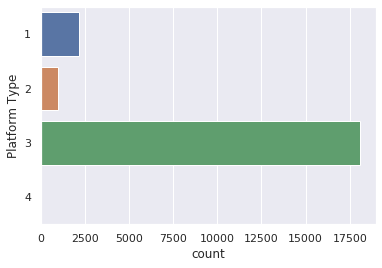

In [0]:
sns.countplot(data=train, y='Platform Type', orient='h');

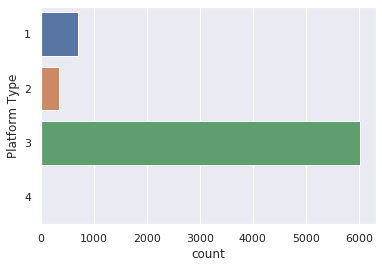

In [0]:
sns.countplot(data=test, y='Platform Type', orient='h');

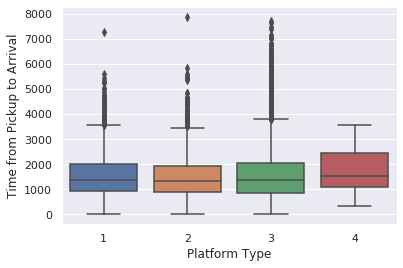

In [0]:
sns.boxplot(data=train, x='Platform Type', y='Time from Pickup to Arrival');

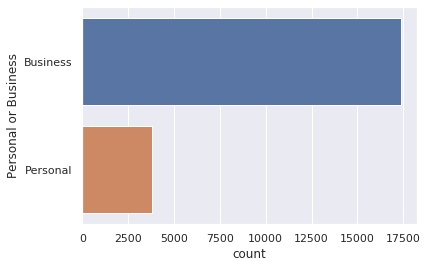

In [0]:
sns.countplot(data=train, y='Personal or Business', orient='h');

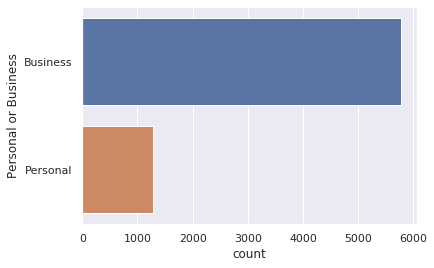

In [0]:
sns.countplot(data=test, y='Personal or Business', orient='h');

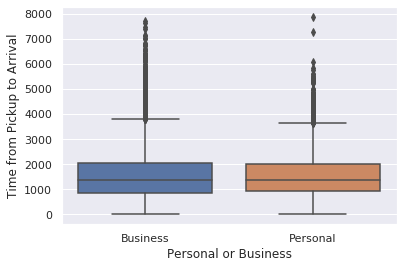

In [0]:
sns.boxplot(data=train, x='Personal or Business', y='Time from Pickup to Arrival');

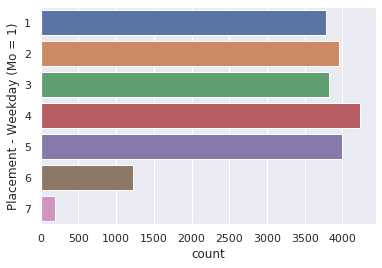

In [0]:
sns.countplot(data=train, y='Placement - Weekday (Mo = 1)', orient='h');

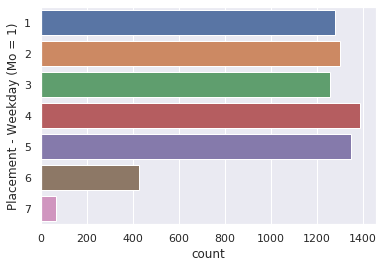

In [0]:
sns.countplot(data=test, y='Placement - Weekday (Mo = 1)', orient='h');

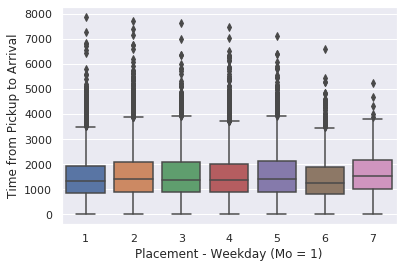

In [0]:
sns.boxplot(data=train, x='Placement - Weekday (Mo = 1)', y='Time from Pickup to Arrival');

In [0]:
test.shape, train.shape

((7068, 24), (21201, 28))

In [0]:
train['Precipitation in millimeters'].isna().sum()

20649

In [0]:
test['Precipitation in millimeters'].isna().sum()

6869

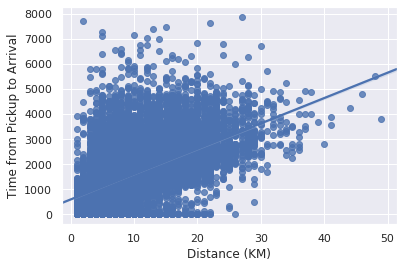

In [0]:
sns.regplot(data=train, x='Distance (KM)', y='Time from Pickup to Arrival');

In [0]:
import scipy.spatial.distance as distance

In [0]:
# train['euc_dist'] = train[['Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long']] \
# .apply(lambda x: distance.euclidean(x[:2].values, x[2:].values), axis=1)
dist_funcs = [distance.hamming, distance.jaccard, distance.kulsinski, distance.minkowski]
dist_funcs_names = ['hamming', 'jaccard', 'kulsinski', 'minkowski']
for dist_func_name, dist_func in zip(dist_funcs_names, dist_funcs):
    train[f'{dist_func_name}_dist'] = train[['Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long']] \
    .apply(lambda x: dist_func(x[:2].values, x[2:].values), axis=1)

# distance.euclidean(train[['Pickup Lat', 'Pickup Long']], train[[]])

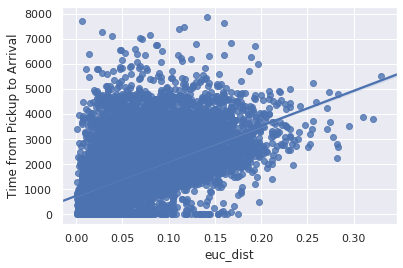

In [0]:
sns.regplot(data=train, x='euc_dist', y='Time from Pickup to Arrival');

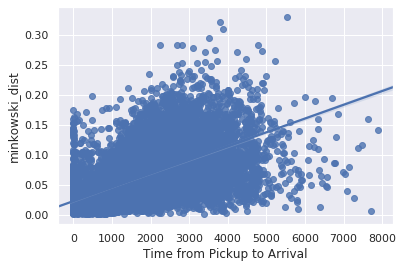

In [0]:
# fig, axs = plt.subplots(nrows=len(dist_funcs_names), figsize=(10,7))
# for i, dist_name in enumerate(dist_funcs_names):
sns.regplot(x='Time from Pickup to Arrival', y='minkowski_dist', data=train);

In [0]:
train.head()

,Order No,User Id,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,euc_dist,hamming_dist,jaccard_dist,kulsinski_dist,minkowski_dist
0,Order_No_4211,User_Id_633,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,0.017360,1.0,1.0,1.513816,0.017360
1,Order_No_25375,User_Id_2285,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,0.102001,1.0,1.0,1.513800,0.102001
2,Order_No_1899,User_Id_265,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,0.016912,1.0,1.0,1.513816,0.016912
3,Order_No_9336,User_Id_1402,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,0.044465,1.0,1.0,1.513839,0.044465
4,Order_No_27883,User_Id_1737,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,0.033501,1.0,1.0,1.513839,0.033501


In [0]:
riders = pd.read_csv(PATH_TO_DATA / 'given/Riders.csv')

In [0]:
riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [0]:
train['Rider Id'].nunique()

924

In [0]:
train['User Id'].nunique()

3186

In [0]:
train = train.merge(riders, how='left', on='Rider Id')
test = test.merge(riders, how='left', on='Rider Id')

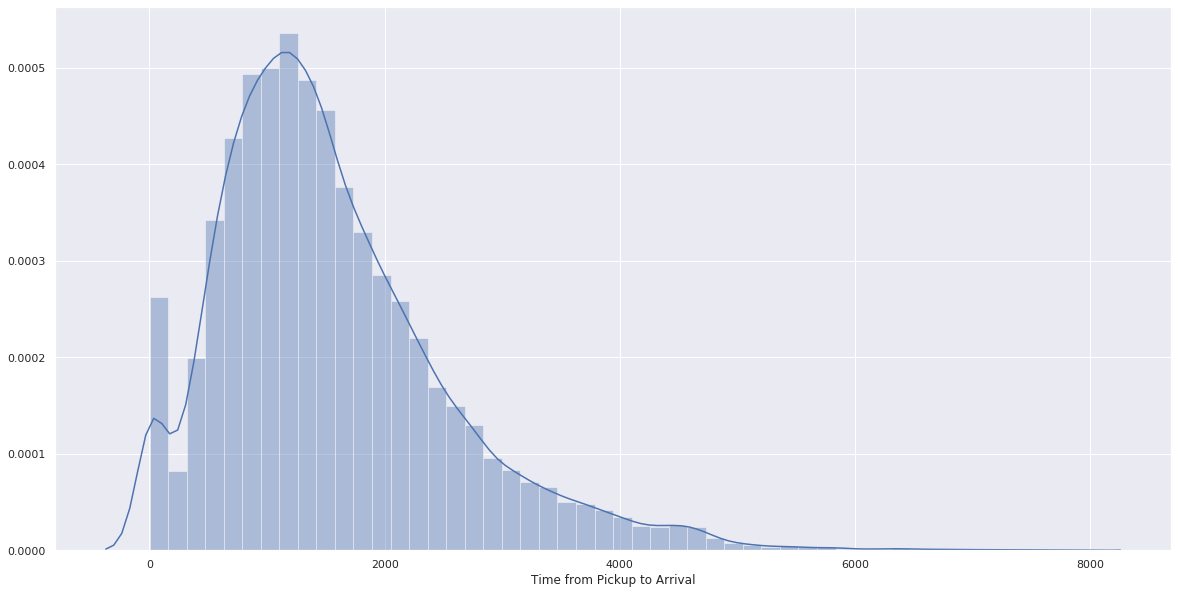

In [0]:
fig = plt.figure(figsize=(20, 10))
sns.distplot(train['Time from Pickup to Arrival']);

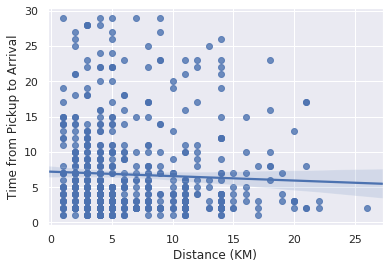

In [0]:
sns.regplot(data=train.query('`Time from Pickup to Arrival` < 30'), x='Distance (KM)', y='Time from Pickup to Arrival');

In [0]:
train['Time from Pickup to Arrival'].describe()

count    21201.000000
mean      1556.920947
std        987.270788
min          1.000000
25%        882.000000
50%       1369.000000
75%       2040.000000
max       7883.000000
Name: Time from Pickup to Arrival, dtype: float64

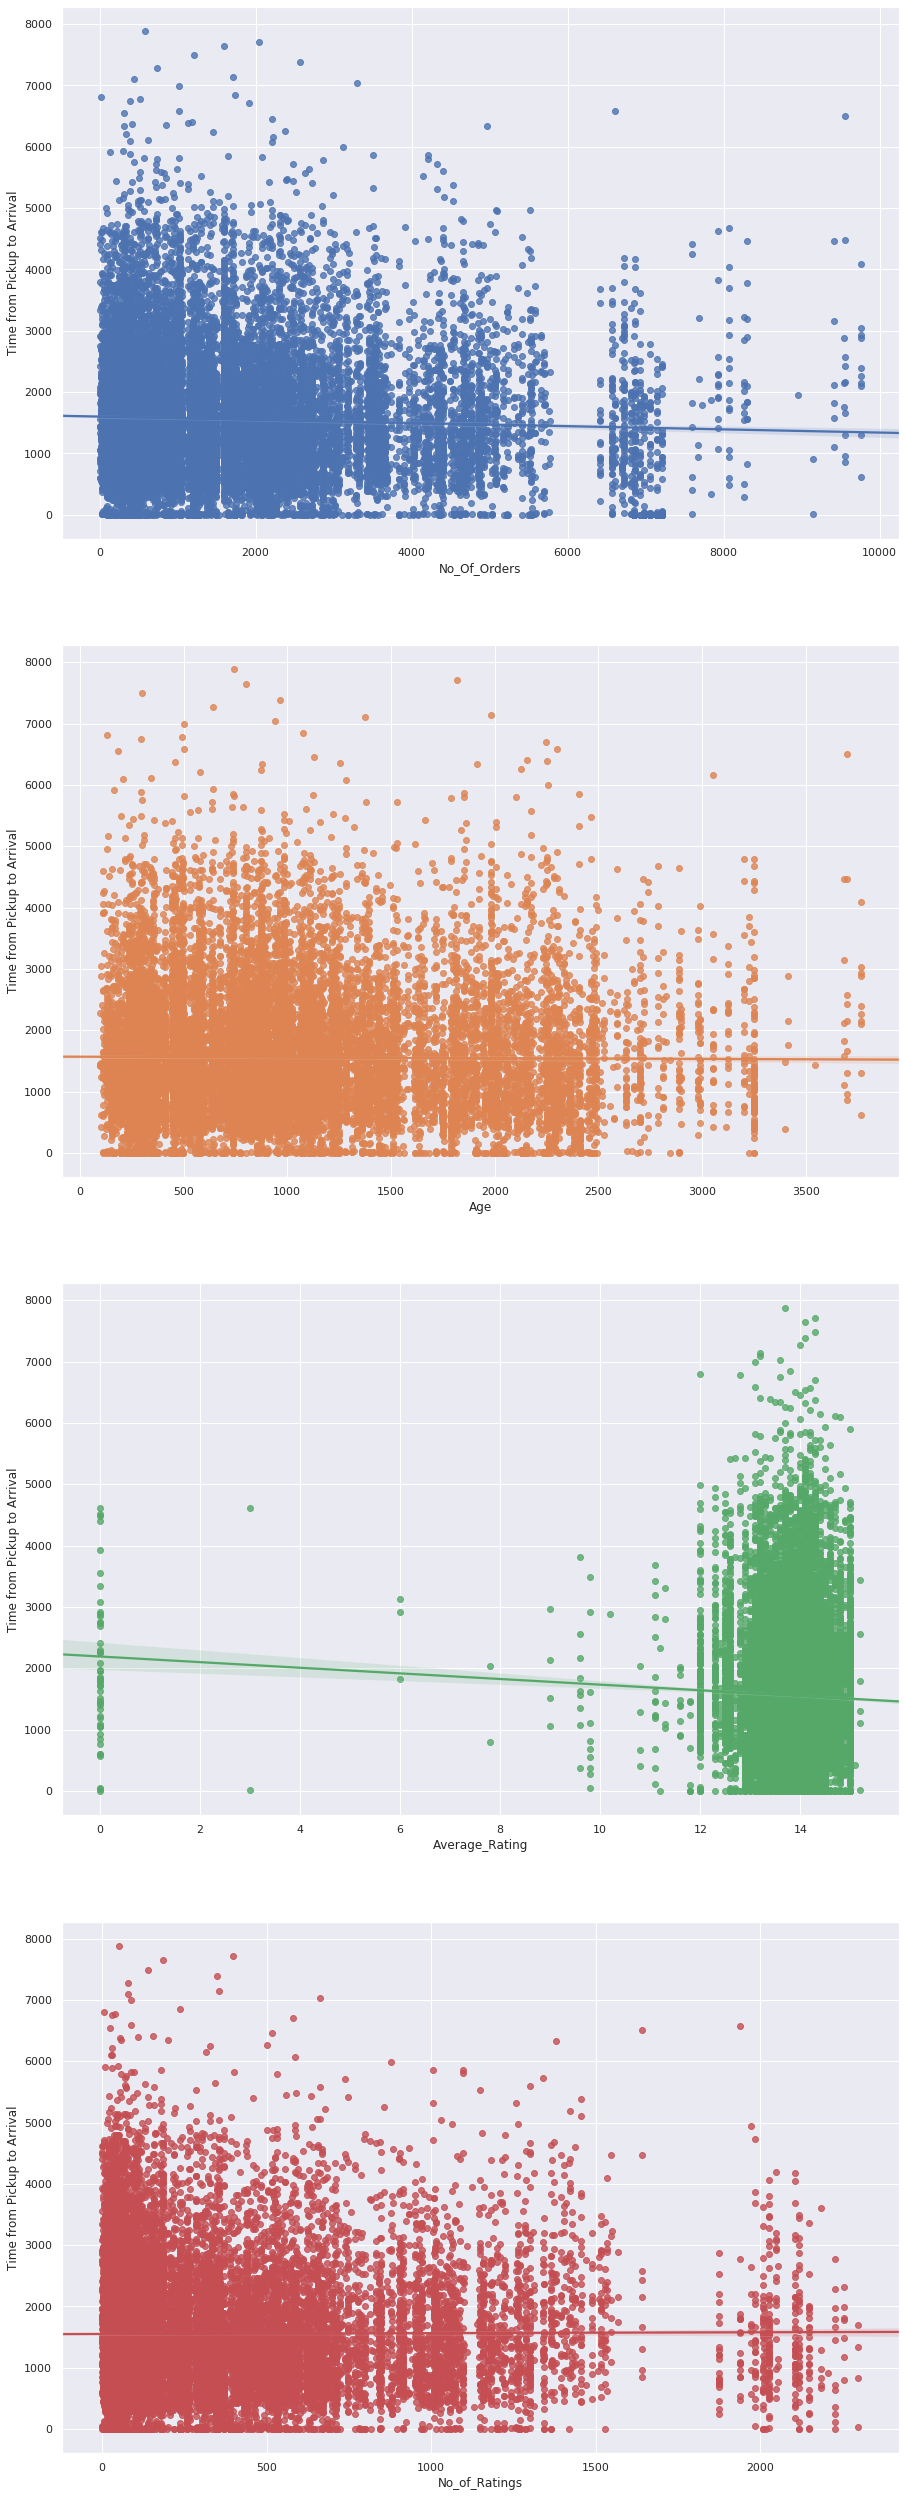

In [0]:
riders_cols = riders.columns[1:]
fig, ax = plt.subplots(nrows=len(riders_cols),figsize=(15,45))
for i, col in enumerate(riders_cols):
    sns.regplot(data=train, x=col, y='Time from Pickup to Arrival', ax=ax[i]);